In [1]:
import tensorflow as tf

tf.enable_eager_execution()

# Exploring Meta-dataset's TFRecords

In [2]:
RECORDS_DIR = "/Users/gomerudo/workspace/thesis_results/dtd"

In [3]:
# Import to list files in directories
import glob

tfrecords_list = sorted(glob.glob("{dir}/*.tfrecords".format(dir=RECORDS_DIR)))

In [4]:
tfrecord_data = tf.data.TFRecordDataset(tfrecords_list)
o_classes = tfrecord_data.output_classes
o_shapes = tfrecord_data.output_shapes
o_types = tfrecord_data.output_types

print(
    "tfrecord_data | Type: {t} | Value: {v}".format(
        t=type(tfrecord_data), v=tfrecord_data
    )
)
print("Type of 'tfrecord_data' is: {t}".format(t=type(tfrecord_data)))


print(
    "  o_classes | Type: {t} | Value: {v}".format(
        t=type(o_classes), v=str(o_classes)
    )
)

print(
    "  output_shapes | Type: {t} | Value: {v}".format(
        t=type(o_shapes), v=str(o_shapes)
    )
)

print(
    "  o_types | Type: {t} | Value: {v}".format(
        t=type(o_types), v=str(o_types)
    )
)




tfrecord_data | Type: <class 'tensorflow.python.data.ops.readers.TFRecordDatasetV1'> | Value: <TFRecordDatasetV1 shapes: (), types: tf.string>
Type of 'tfrecord_data' is: <class 'tensorflow.python.data.ops.readers.TFRecordDatasetV1'>
  o_classes | Type: <class 'type'> | Value: <class 'tensorflow.python.framework.ops.Tensor'>
  output_shapes | Type: <class 'tensorflow.python.framework.tensor_shape.TensorShapeV1'> | Value: ()
  o_types | Type: <class 'tensorflow.python.framework.dtypes.DType'> | Value: <dtype: 'string'>


In [ ]:
# all_classes = set()
summary = dict()
# Iterate over all files
for tf_record in tfrecords_list:
    record_iterator = tf.python_io.tf_record_iterator(path=tf_record)
    
    for string_record in record_iterator:
        example = tf.train.Example()
        example.ParseFromString(string_record)
#         print(example)
#         ele_as_dict = dict(example.features.feature)
#         print(ele_as_dict['image'])
        print(example.features.feature.get("image").bytes_list.value[0])
        break
#         label = example.features.feature.get("label").int64_list.value[0]
#         try:
#             summary[str(label)] += 1
#         except Exception as ex:
#             summary[str(label)] = 1


In [5]:
# Create a description of the features.  
feature_description = {
    'image': tf.FixedLenFeature([], dtype=tf.string),
    'label': tf.FixedLenFeature([], tf.int64)
}

def _parse_image_function(example_proto):
  # Parse the input tf.Example proto using the dictionary above.
  return tf.parse_single_example(example_proto, feature_description)

parsed_image_dataset = tfrecord_data.map(_parse_image_function)
parsed_image_dataset



<DatasetV1Adapter shapes: {image: (), label: ()}, types: {image: tf.string, label: tf.int64}>

48872.5


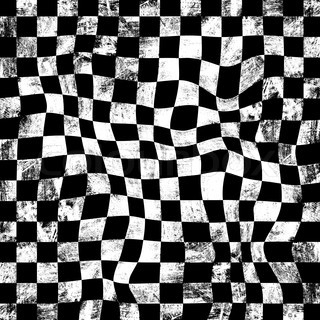

18315.0


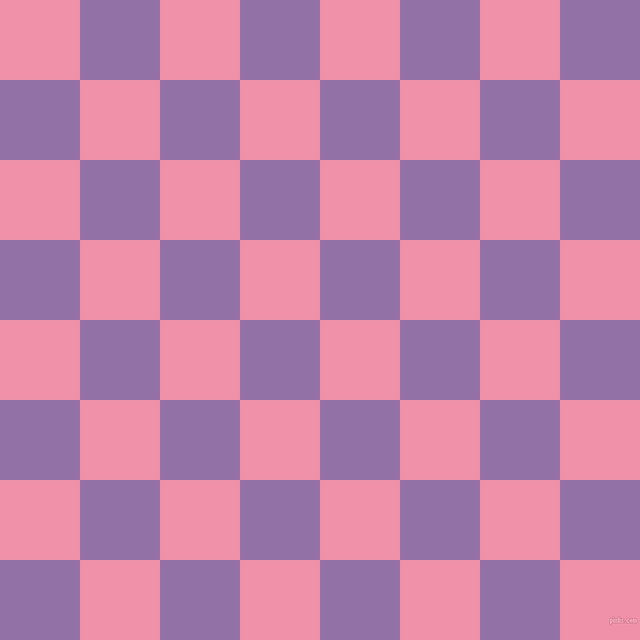

83062.0


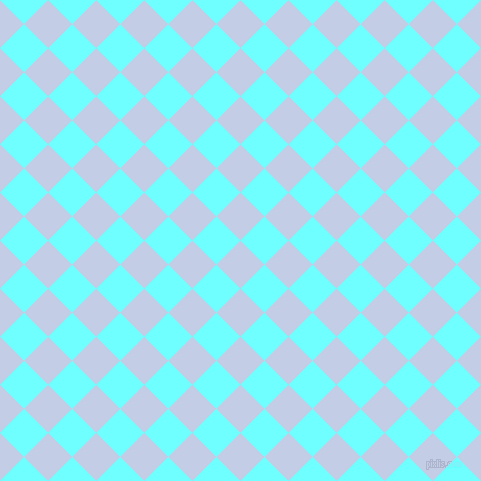

77405.5


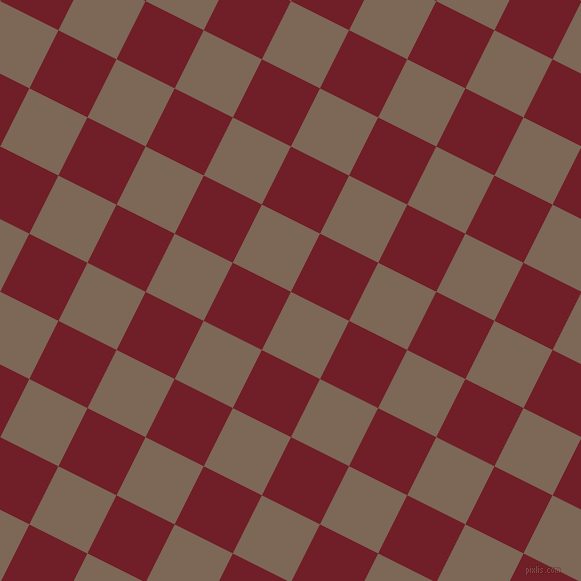

24720.5


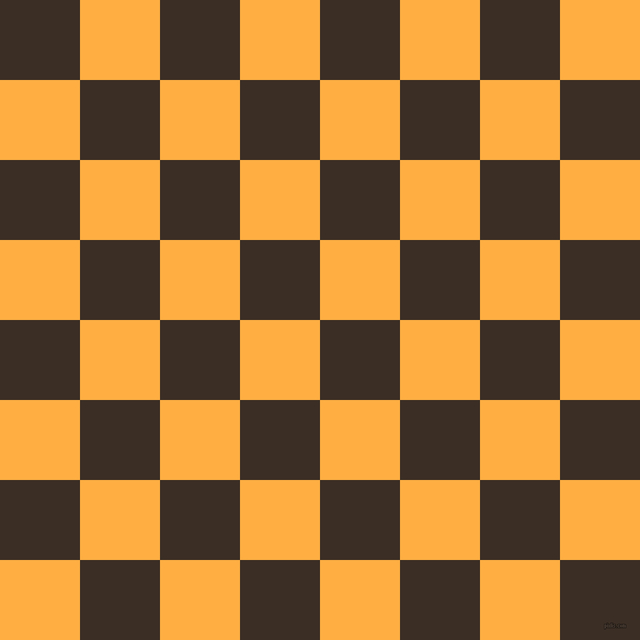

92405.0


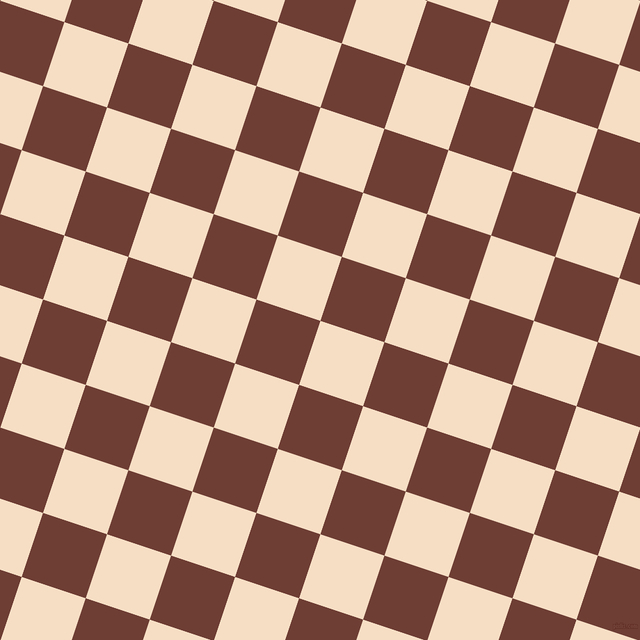

14558.0


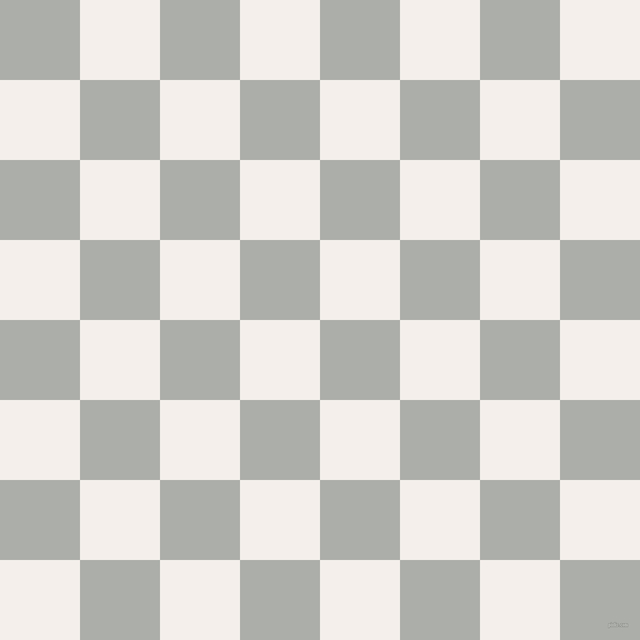

49965.5


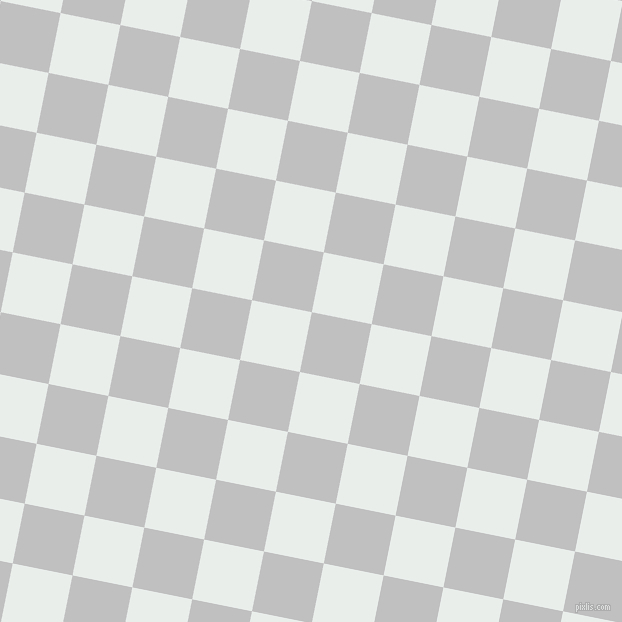

161035.5


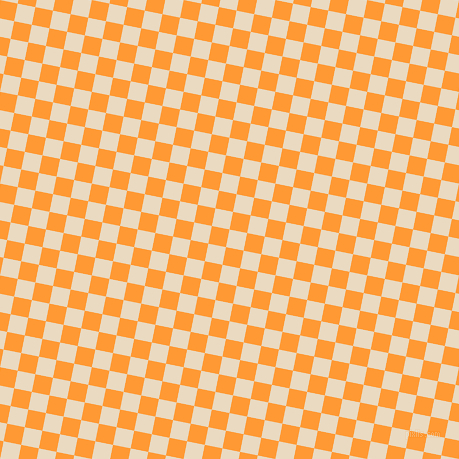

17580.0


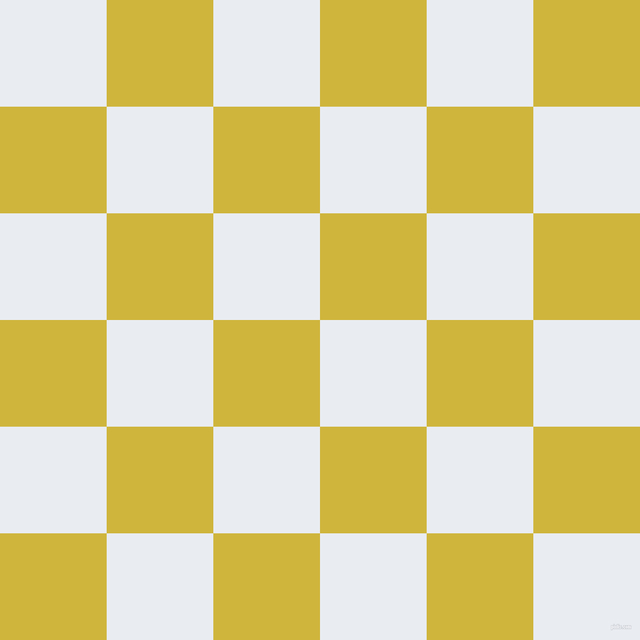

187626.0


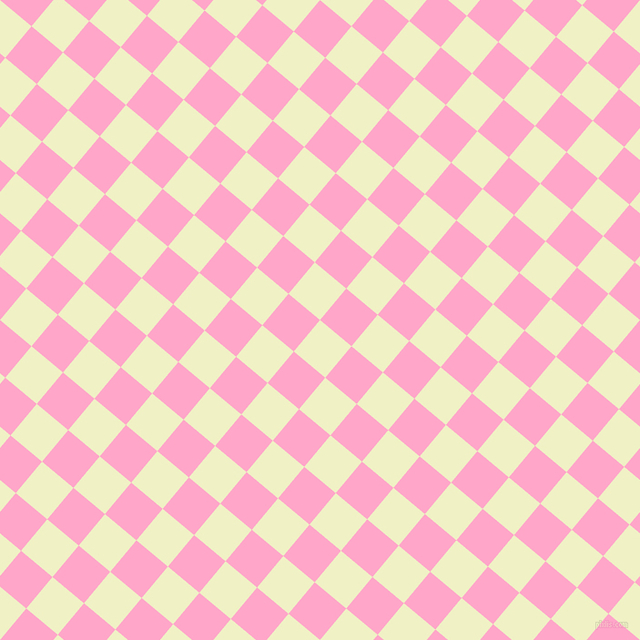

397817.0


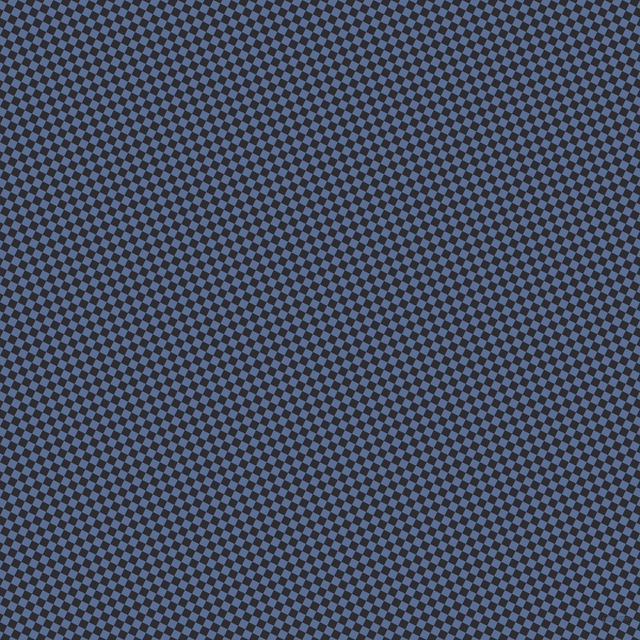

In [34]:
import IPython.display as display
import numpy as np
count = 0
COUNT_MAX = 10
for image_features in parsed_image_dataset:
    image_raw = image_features['image'].numpy()
    arr = np.frombuffer(image_raw, dtype=np.uint8)
    print(arr.shape[0]/2)
    image = display.Image(data=image_raw)
#     print(image.width)
    display.display(image)
#     print(image_raw)
    if count > COUNT_MAX:
        break
    count += 1
    
    


In [50]:
t1 = [[
        [[1, 2, 3], [4, 5, 6]],
        [[7, 8, 9], [10, 11, 12]],
     ],
    [
        [[1, 2, 3], [4, 5, 6]],
        [[7, 8, 9], [10, 11, 12]],
     ]]

t2 = [[
        [[13, 14, 15], [16, 17, 18]],
        [[19, 20, 21], [22, 23, 24]],
     ],
     [
        [[13, 14, 15], [16, 17, 18]],
        [[19, 20, 21], [22, 23, 24]],
     ]]

# a = tf.concat([t1, t2], 0)  # [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]
# b = tf.concat([t1, t2], 1)  # [[1, 2, 3, 7, 8, 9], [4, 5, 6, 10, 11, 12]]

# t1 = tf.layers.Flatten()(t1)
# t2 = tf.layers.Flatten()(t2)

# print(tf.shape(t1))
# print(tf.shape(t2))

res = tf.concat([t1, t2], 0)  # [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]
print(tf.shape(res))


tf.Tensor([4 2 2 3], shape=(4,), dtype=int32)
